In [248]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import TensorDataset
import numpy as np

from src.gan.generator import Generator
from src.gan.discriminator import Discriminator

from src.data_loaders.datasets.generated_fake_dataset import get_noise_for_nn
from src.data_loaders.datasets.fashion_mnist_dataset import FashionMNISTDataset
from src.data_loaders.datasets.generated_fake_dataset import GeneratedFakeDataset
from src.data_loaders.datasource import show_images_from_tensor
from src.classic.utils import count_model_parameters

In [249]:
device = torch.device("cuda:0")

In [250]:
#models
latent_dim = 32
generator = Generator(latent_dim=latent_dim, hidden_dim=40, output_dim=784).to(device)
discriminator = Discriminator(hidden_dim=40, input_dim=784).to(device)

In [251]:
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)
generator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=generator_optimizer, gamma=0.99)

In [252]:
criterion = nn.MSELoss()

In [253]:
num_epochs = 2
sample_size = 10000

In [254]:
generator.load_state_dict(torch.load("../../pre-trained/generator"))
discriminator.load_state_dict(torch.load("../../pre-trained/discriminator"))

<All keys matched successfully>

In [255]:
for epoch in range(num_epochs):
    # Generate batch of latent vectors
    noise = torch.randn(sample_size, latent_dim, device=device)
    # Generate fake image batch with Generator
    fake_images = generator(noise)
    generator_optimizer.zero_grad()
    label = torch.ones((sample_size,), dtype=torch.float, device=device)  # fake labels are real for generator cost
    # Since we just updated D, perform another forward pass of all-fake batch through D
    output = discriminator(fake_images).view(-1)
    # Calculate G's loss based on this output

    # mean_discriminator_output = -output.mean()
    # mean_discriminator_output.backward()
    # difference criterion
    error_generator = criterion(output, label)
    error_generator.backward()
    print(f"Epoch: {epoch}")
    print(f"Generator mean error {error_generator.item()}")

    generator_optimizer.step()
    # Output training stats
    # # Save Losses for plotting later
    print(f"Discriminator mean output fpr generated images {output.mean().item()}")



Epoch: 0
Generator mean error 0.86271071434021
Discriminator mean output fpr generated images 0.08005301654338837
Epoch: 1
Generator mean error 0.8420735001564026
Discriminator mean output fpr generated images 0.0918634757399559


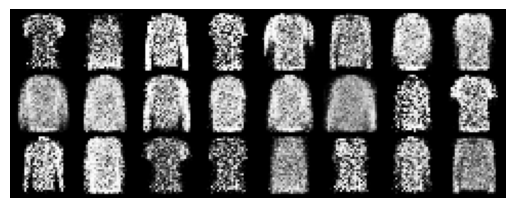

In [256]:
num_of_samples = 24
generated_images = generator(get_noise_for_nn(generator.get_latent_dim(), num_of_samples, generator.device)).detach().cpu()
show_images_from_tensor(generated_images)